In [18]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt

# Termodinâmica avançada

# Desafio 1

## Introdução

Esse trabalho será realizado durante a disciplina de termodinâmica avançada da Ilum escola de Ciência. O problema proposto é entender e estudar conceitos de potenciais termodinâmicos e interações moleculares a partir do estudo do Ciclo de Rankine. O ciclo Rankine é um processo termodinâmico que é a base de usinas a vapor que geram energia elétrica. Esse ciclo é constituído das seguintes etapas: i) um fluído de alta pressão é bombeado para dentro do ciclo (ii) e entra em uma caldeira, onde calor é adicionado a pressão constante para o líquido comprimido. iii) o vapor atinge a turbina, onde se expande adiabaticamente, esfria e acaba na pressão baixa original. (iv) Finalmente, o fluido parcialmente condensado é resfriado ainda mais em um condensador (Schroeder, 2000)(Miller, 2011).

Além disso, como observável no diagrama abaixo, outras fases anteriores e posteriores ao ciclo de Rankine também serão estudados. 

![Diagrama representativo](imagem/diagrama.png)
<center><b>Imagem 1</b> - Esquema que representa o trabalho a ser desenvolvido ao longo do semestre</center>


## Primeiro desafio

O primeiro desafio proposto é a escolha de uma mistura com potencial para fornecimento de energia ao ciclo Rankine (responsável pela geração de energia elétrica). A mistura escolhida pela dupla foi o Pentano(C<sub>5</sub>H<sub>12</sub>) e o Benzeno(C<sub>6</sub>H<sub>6</sub>).

Para escolher a mistura adequada, foram considerados quatro critérios principais. O primeiro critério foi a entalpia, que mede a energia térmica envolvida na mistura. A entalpia que iremos utilizar para determinar a mistura é a entalpia de combustão, isso porque no processo descrito na imagem 1, no desafio 3 terá a queima da mistura para aquecer o boiler, logo precisaremos da energia gerada por esse processo. A entalpia de combustão é um valor utilizado para medir a energia total liberada em forma de calor quando a substâncias sofre combustão completa em presença de oxigênio em condições padrão. De acordo com o webbook o [benzeno](https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2) possue entalpia de combustão de $-3267 \pm 20$, e o [pentano](https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1) de $-3535.4 \pm  0.96$.

O segundo critério foi a disponibilidade de um diagrama de fases para a mistura, que nos dá a relação entre as fases de uma substância em várias temperaturas e pressões (McQuaire e Simon, 1957) . Esse diagrama será essencial nas próximas etapas do trabalho. Como não haverá experimentos para coletar os dados, é necessário ter um diagrama de fases pronto para viabilizar os estudos. O diagra está mostrado na Imagem 2.

  ![Diagrama de fase.](imagem/diagrama_fases.png)
  
<center> <b>Imagem 2 </b> - Diagrama de fases da mistura. <b>Fonte:</b> Panfilov e Koldoba, 2016</center>

Seguindo a mesma linha, o terceiro critério foi a "popularidade" dos componentes da mistura. Optamos por utilizar benzeno e pentano, substâncias amplamente conhecidas e estudadas, cujas informações são facilmente acessíveis. Isso facilitará a obtenção dos dados necessários para o projeto, como a entalpia.

Por fim, o quarto critério foi o baixo ponto de vaporização dos elementos da mistura. O Ciclo Rankine funciona a partir da energia gerada pelo vapor, de modo que quanto menor a temperatura de vaporização, menor será a energia necessária para aquecer e vaporizar a mistura. Tanto o benzeno quanto o pentano apresentam pontos de vaporização relativamente baixos, o que os torna bons candidatos para aplicação no Ciclo Rankine. A temperatura de vaporização do benzeno é 80.1°C e do pentano é 36.1°C (quase em temperatura ambiente).


## Referências

[1] Schroeder, Daniel V. (2000). An introduction to thermal physics. San Francisco, CA: Addison Wesley. 

[2] MILLER, Bruce G. Clean Coal Technologies for Advanced Power Generation. In: MILLER, Bruce G. Clean Coal Engineering Technology. Butterworth-Heinemann, 2011. p. 251-300.

[2] Benzene. Disponível em: <https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2>. Acesso em: 22 mar. 2023.

[3] Pentane. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1>. Acesso em: 22 mar. 2023.

[4] McQuarrie, Donald A. (Donald Allan). Physical Chemistry : a Molecular Approach. Sausalito, Calif. University Science Books, 1997.

[5] PANFILOV, Mikhail; KOLDOBA, Alexandre. Kelvin’s Dissymmetric Models and Consistency Conditions of Multicomponent Gas-Liquid Equilibrium and Capillary Condensation. Journal of Thermodynamics, v. 2016, p. 1–21, 2016. Disponível em: <https://www.hindawi.com/journals/jther/2016/3806364/>. Acesso em: 22 mar. 2023. 


# Desafio 2


## Diagrama de fase por temperatura

In [2]:
df_diagrama=pd.read_csv("dados_diagrama.txt")
Unidades = {
    "Temperature" : "ºC",
    "x1": "mol fract.", 
    "y1": "mol fract.", 
}

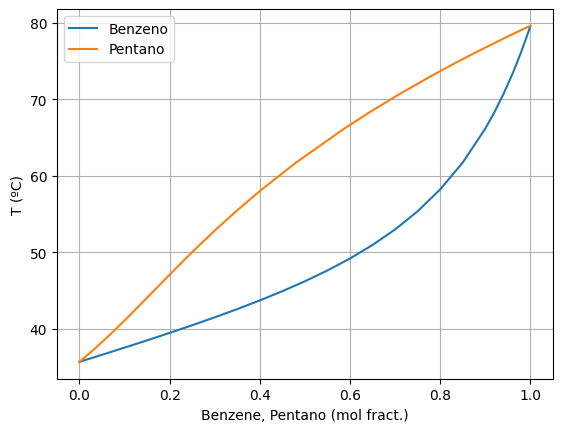

In [109]:
plt.plot(df_diagrama[" x1 "].values,df_diagrama["Temperature"].values,label='Benzeno')
plt.plot(df_diagrama[" y1"].values,df_diagrama["Temperature"].values,label='Pentano')
plt.ylabel("T (ºC)")
plt.xlabel("Benzene, Pentano (mol fract.)")
plt.legend()
plt.grid()
plt.show()

### Pressão de vapor do benzeno

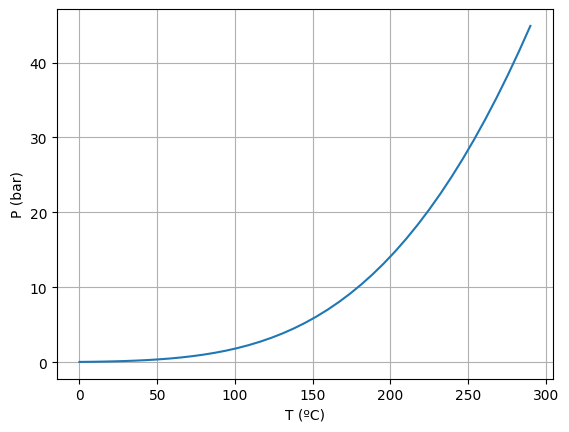

In [108]:
pressão_vapor_benzeno = pd.read_csv("pressão_vapor_benzeno.txt").drop(0,axis=0).astype('float')
pressão_vapor_benzeno.plot(x="Temperature",legend=False)
plt.ylabel("P (bar)")
plt.xlabel("T (ºC)")
plt.grid()
plt.show()

### Presão de vapor do pentano

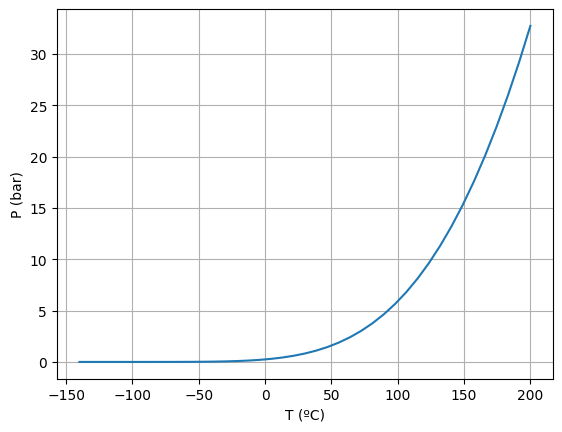

In [107]:
pressão_vapor_pentano = pd.read_csv("pressão_vapor_pentano.txt").drop(0,axis=0).astype('float')
pressão_vapor_pentano.plot(x="Temperature",legend=False)
plt.ylabel("P (bar)")
plt.xlabel("T (ºC)")
plt.grid()
plt.show()